### Utility function check

In [2]:
from functions import *

In [3]:
#### how to treat the exceptions..
### take a look at each folder and modify the show class first

In [4]:
showData(4)
# this 

,img_no,ear_r_x,ear_r_y,ear_l_x,ear_l_y,eye_r_x,eye_r_y,eye_l_x,eye_l_y,nose_x,nose_y
3,img_0004.jpg,156.0,49.0,NaN,NaN,215.0,73.0,NaN,NaN,279.0,83.0


In [19]:
showData(754)

,img_no,ear_r_x,ear_r_y,ear_l_x,ear_l_y,eye_r_x,eye_r_y,eye_l_x,eye_l_y,nose_x,nose_y
753,img_0754.jpg,NaN,NaN,311.0,55.0,NaN,NaN,260.0,51.0,192.0,31.0


In [ ]:
def showClass_update(data):
    """
    This function shows the pose class according to the approx. pan angle as followings:
    right(1) - (2) - (3) - (4) - front face(5) - (6)- (7) - (8) - left(9)
    Input: dataframe (only a little part of the total data is recommended)
    Output: image, class, and no. of exception cases
    """ 
    
    n1=0 # to calculate the num of exception in case 1
    n2=0 # to calculate the num of exception in case 2
    
    # retrieve data strip
    for data_num in range(len(data)):  # need to take an absolute coords!
#         fr_num=data_num+1
        df = data.iloc[[data_num]]
        fr_num = data_num2fr_num(df)
        # Basically, the pan angle class starts from the right to the left
        # 
    
        ########################################################
        # case 1: if there exists at least one NaN in the data #
        ########################################################

        if df.isnull().values.any(): # dealing with the case where there's any NaN

            # remove when there is no nose pose info  (This removes 89 cases)     
            if df.isnull()['nose_x'].item():
                print("fr_num: {} = no nose".format(fr_num))
                showImage(fr_num, all_path)

            # case 1-1: head turned to the right approx. over 45 degrees
            elif df.isnull()['eye_r_x'].item()&df.notnull()['ear_r_x'].item()&df.notnull()['ear_l_x'].item():
                # case 1-1-1: approx. 45 to 90 
                if df['ear_l_x'].item()-df['ear_r_x'].item() > 0:
                    print("fr_num: {} 'CLASS 2' = turning to the right (approx. 45 to 90 degrees)".format(fr_num))
                    showImage(fr_num, all_path)
                # case 1-1-2: approx. over 90  # ref. frame 30
                else:
                    print("fr_num: {} 'CLASS 1' = turning to the right (approx. over 90 degrees)".format(fr_num))
                    showImage(fr_num, all_path)

            # case 1-2: head turned to the left approx. over 45 degrees
            elif df.isnull()['eye_l_x'].item()&df.notnull()['ear_r_x'].item()&df.notnull()['ear_l_x'].item():
                    # case 1-2-1: approx. 45 to 90
                if df['ear_l_x'].item()-df['ear_r_x'].item() > 0:
                    print("fr_num: {} 'CLASS 8' =turning to the left (approx. 45 to 90 degrees)".format(fr_num))
                    showImage(fr_num, all_path)
                # case 1-2-2: approx. over 90  
                else:
                    print("fr_num: {} 'CLASS 9' = turning to the left (approx. over 90 degrees)".format(fr_num))
                    showImage(fr_num, all_path)
                    
            # [addition to the] case 1 :  approx. over 90 # ref. fr_num 4 
            # only right eye, ear, and nose are present
            elif df.isnull()['eye_l_x'].item()&df.isnull()['ear_l_x'].item()&df.notnull()['eye_r_x'].item()&df.notnull()['ear_r_x'].item():
                print("fr_num: {} 'CLASS 9' = turning to the left (approx. over 90 degrees)".format(fr_num))
                showImage(fr_num, all_path)
            # only left eye, ear, and nose are present
            elif df.isnull()['eye_r_x'].item()&df.isnull()['ear_r_x'].item()&df.notnull()['eye_l_x'].item()&df.notnull()['ear_l_x'].item():
                print("fr_num: {} 'CLASS 1' = turning to the right (approx. over 90 degrees)".format(fr_num))
                showImage(fr_num, all_path)
            
            
            else:    
                n1 += 1                
                print("fr_num: {} = Exceptions reported from case 1".format(fr_num))
                showImage(fr_num, all_path)
    #       ----  

        ##############################################
        # case 2: all parts are detected without NaN #
        ##############################################

        else: 
            img, mark = showMarkInFct(df)
            ear_rx, ear_ry = mark[0]
            ear_lx, ear_ly = mark[1]
            ear_cx, ear_cy = mark[2]
            eye_rx, eye_ry = mark[3]
            eye_lx, eye_ly = mark[4]
            eye_cx, eye_cy = mark[5]
            n_x, n_y = mark[6]

            # nose is located between eyes (then we determine using proportion)
            if eye_rx<n_x & n_x<eye_lx:
                hori_eyes=abs(eye_lx-eye_rx)
                n_r_dev_raw=abs(eye_rx-n_x)
                n_l_dev_raw=abs(eye_lx-n_x)
                assert n_r_dev_raw+n_l_dev_raw == hori_eyes
                # how much the nose deviates: 
                n_r_dev=n_r_dev_raw/hori_eyes #if smaller than 0.5 -> turning to the right
                n_l_dev=n_l_dev_raw/hori_eyes # if smaller than 0.5 -> turning to the left
                print('|R_eye---({:.2f})---N---({:.2f})---L_eye|'.format(n_r_dev, n_l_dev))
                # define the front face when n_r_dev and n_l_dev is larger than 0.25 
                # to be a front face, those numbers should be between 0.5 w.r.t. the center
                if (n_r_dev >0.25) & (n_l_dev>0.25):
                    print("fr_num: {} 'CLASS 5' = front face".format(fr_num))
                    showImage(fr_num, all_path)
                elif n_r_dev >0.25:
                    print("fr_num: {} 'CLASS 6' = turning to the left within approx. 22.5 degrees".format(fr_num))
                    showImage(fr_num, all_path)
                else:
                    print("fr_num: {} 'CLASS 4' = turning to the right within approx. 22.5 degrees".format(fr_num))
                    showImage(fr_num, all_path)

            # nose is located outside of the right eye 
            elif eye_rx>=n_x & n_x<eye_lx:
                print("fr_num: {} 'CLASS 3' = turned to the right (approx. 22.5 to 45 degrees)".format(fr_num))
                showImage(fr_num, all_path)

            elif eye_rx<n_x & n_x>=eye_lx:
                print("fr_num: {} 'CLASS 7' = turned to the left (approx. 22.5 to 45 degrees)".format(fr_num))
                showImage(fr_num, all_path)

            else:
                n2+=1               
                print("fr_num: {} = Exceptions reported from case 2".format(fr_num))
                showImage(fr_num, all_path)
                
    return print('''Exceptions from case 1 = {} 
                 from case 2 = {}'''.format(n1, n2))

In [20]:
from tqdm.notebook import tqdm
from time import sleep

In [2]:
data_part = data[1000:1010]

|R_eye---(0.04)---N---(0.96)---L_eye|
fr_num: 1001 'CLASS 4' = turning to the right within approx. 22.5 degrees


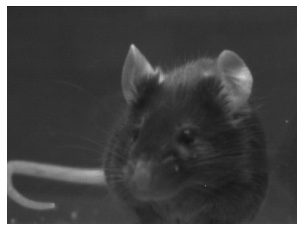

|R_eye---(0.12)---N---(0.88)---L_eye|
fr_num: 1002 'CLASS 4' = turning to the right within approx. 22.5 degrees


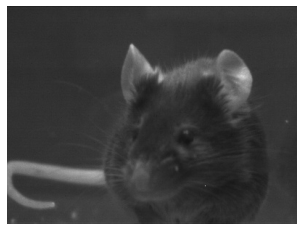

|R_eye---(0.03)---N---(0.97)---L_eye|
fr_num: 1003 'CLASS 4' = turning to the right within approx. 22.5 degrees


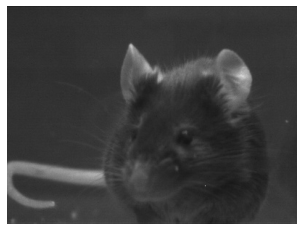

|R_eye---(0.10)---N---(0.90)---L_eye|
fr_num: 1004 'CLASS 4' = turning to the right within approx. 22.5 degrees


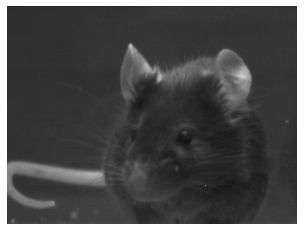

|R_eye---(0.12)---N---(0.88)---L_eye|
fr_num: 1005 'CLASS 4' = turning to the right within approx. 22.5 degrees


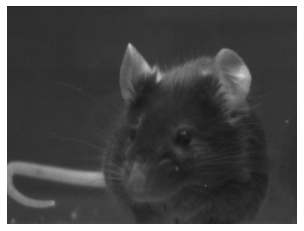

|R_eye---(0.04)---N---(0.96)---L_eye|
fr_num: 1006 'CLASS 4' = turning to the right within approx. 22.5 degrees


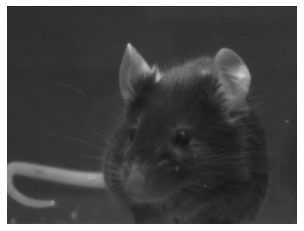

|R_eye---(0.07)---N---(0.93)---L_eye|
fr_num: 1007 'CLASS 4' = turning to the right within approx. 22.5 degrees


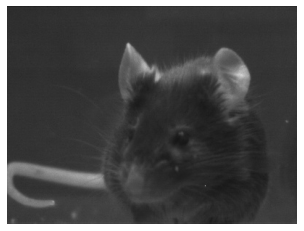

|R_eye---(0.08)---N---(0.92)---L_eye|
fr_num: 1008 'CLASS 4' = turning to the right within approx. 22.5 degrees


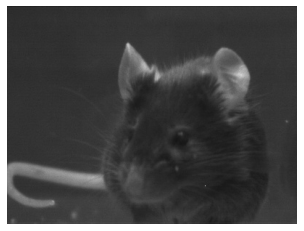

|R_eye---(0.01)---N---(0.99)---L_eye|
fr_num: 1009 'CLASS 4' = turning to the right within approx. 22.5 degrees


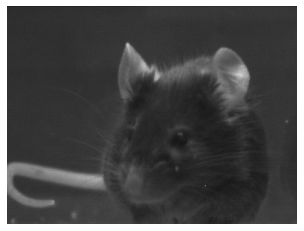

fr_num: 1010 'CLASS 3' = turned to the right (approx. 22.5 to 45 degrees)


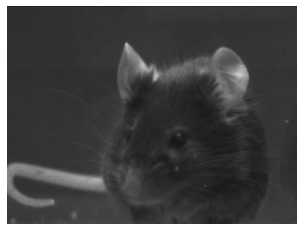

Exceptions from case 1 = 0 
                 from case 2 = 0


In [3]:
showClass(data_part)

In [5]:
data_part

,img_no,ear_r_x,ear_r_y,ear_l_x,ear_l_y,eye_r_x,eye_r_y,eye_l_x,eye_l_y,nose_x,nose_y
1000,img_1001.jpg,174.0,88.0,313.0,93.0,177.0,175.0,247.0,180.0,180.0,249.0
1001,img_1002.jpg,180.0,86.0,318.0,98.0,173.0,177.0,248.0,175.0,182.0,238.0
1002,img_1003.jpg,171.0,90.0,315.0,96.0,176.0,179.0,248.0,179.0,178.0,244.0
1003,img_1004.jpg,177.0,90.0,314.0,101.0,175.0,174.0,248.0,177.0,182.0,241.0
1004,img_1005.jpg,172.0,90.0,310.0,98.0,164.0,174.0,246.0,180.0,174.0,241.0
1005,img_1006.jpg,168.0,88.0,311.0,99.0,174.0,173.0,242.0,181.0,177.0,243.0
1006,img_1007.jpg,167.0,86.0,307.0,93.0,167.0,177.0,238.0,180.0,172.0,245.0
1007,img_1008.jpg,169.0,87.0,307.0,91.0,166.0,178.0,240.0,180.0,172.0,248.0
1008,img_1009.jpg,171.0,87.0,302.0,93.0,166.0,178.0,237.0,182.0,167.0,241.0
1009,img_1010.jpg,166.0,89.0,305.0,92.0,169.0,171.0,236.0,180.0,168.0,251.0


In [18]:
data

,img_no,ear_r_x,ear_r_y,ear_l_x,ear_l_y,eye_r_x,eye_r_y,eye_l_x,eye_l_y,nose_x,nose_y
0,img_0001.jpg,265.0,85.0,382.0,95.0,280.0,198.0,342.0,199.0,296.0,276.0
1,img_0002.jpg,248.0,7.0,286.0,24.0,NaN,NaN,206.0,42.0,124.0,41.0
2,img_0003.jpg,265.0,85.0,381.0,96.0,276.0,197.0,338.0,199.0,291.0,276.0
3,img_0004.jpg,156.0,49.0,NaN,NaN,215.0,73.0,NaN,NaN,279.0,83.0
4,img_0005.jpg,170.0,99.0,230.0,99.0,192.0,143.0,234.0,147.0,227.0,183.0
...,...,...,...,...,...,...,...,...,...,...,...
4550,img_4551.jpg,75.0,50.0,210.0,98.0,53.0,152.0,124.0,172.0,47.0,241.0
4551,img_4552.jpg,73.0,47.0,210.0,97.0,53.0,153.0,124.0,174.0,46.0,239.0
4552,img_4553.jpg,70.0,45.0,211.0,92.0,53.0,132.0,122.0,172.0,45.0,242.0
4553,img_4554.jpg,70.0,49.0,205.0,94.0,48.0,145.0,119.0,173.0,36.0,231.0


In [21]:
def saveClass(data):
    
    """
    This function save image file according to the result form showClass:
    
    right(1) - (2) - (3) - (4) - front face(5) - (6)- (7) - (8) - left(9)
    Input: dataframe (only a little part of the total data is recommended)
    Output: no. of all cases saved
    """ 
    print("""
    
    Start saving ...
    
    """)
    
    nc1, nc2, nc3, nc4, nc5, nc6, nc7, nc8, nc9 = 0,0,0,0,0,0,0,0,0
    nn=0 # to calculate the num of no nose cases
    ne1=0 # to calculate the num of exception in case 1
    ne2=0 # to calculate the num of exception in case 2 
    
    # retrieve data strip
    for data_num in range(len(data)):  # need to take an absolute coords!
        df = data.iloc[[data_num]]
        fr_num = data_num2fr_num(df)
        
        fr_num_str = frame2Path(fr_num, all_path)[0]
        img_path = frame2Path(fr_num, all_path)[1] # this might hinder showClass of showMarksInFct, let's see
        
    
        ########################################################
        # case 1: if there exists at least one NaN in the data #
        ########################################################

        if df.isnull().values.any(): # dealing with the case where there's any NaN

            # remove when there is no nose pose info  (This removes 89 cases)     
            if df.isnull()['nose_x'].item():
                nn+=1
                copyfile(img_path, no_nose_path+"img_"+fr_num_str+".jpg")
                
            # case 1-1: head turned to the right approx. over 45 degrees
            elif df.isnull()['eye_r_x'].item()&df.notnull()['ear_r_x'].item()&df.notnull()['ear_l_x'].item():
                # case 1-1-1: approx. 45 to 90 
                if df['ear_l_x'].item()-df['ear_r_x'].item() > 0:
                    nc2+=1
                    copyfile(img_path, c2_path+"img_"+fr_num_str+".jpg")
                # case 1-1-2: approx. over 90  # ref. frame 30
                else:
                    nc1+=1
                    copyfile(img_path, c1_path+"img_"+fr_num_str+".jpg")

            # case 1-2: head turned to the left approx. over 45 degrees
            elif df.isnull()['eye_l_x'].item()&df.notnull()['ear_r_x'].item()&df.notnull()['ear_l_x'].item():
                    # case 1-2-1: approx. 45 to 90
                if df['ear_l_x'].item()-df['ear_r_x'].item() > 0:
                    nc8+=1
                    copyfile(img_path, c8_path+"img_"+fr_num_str+".jpg")
                else:
                    nc9+=1
                    copyfile(img_path, c9_path+"img_"+fr_num_str+".jpg")
            else:    
                ne1 += 1                
                copyfile(img_path, exception1_path+"img_"+fr_num_str+".jpg")

        ##############################################
        # case 2: all parts are detected without NaN #
        ##############################################

        else: 
            img, mark = showMarkInFct(df)
            ear_rx, ear_ry = mark[0]
            ear_lx, ear_ly = mark[1]
            ear_cx, ear_cy = mark[2]
            eye_rx, eye_ry = mark[3]
            eye_lx, eye_ly = mark[4]
            eye_cx, eye_cy = mark[5]
            n_x, n_y = mark[6]

            # nose is located between eyes (then we determine using proportion)
            if eye_rx<n_x & n_x<eye_lx:
                hori_eyes=abs(eye_lx-eye_rx)
                n_r_dev_raw=abs(eye_rx-n_x)
                n_l_dev_raw=abs(eye_lx-n_x)
                assert n_r_dev_raw+n_l_dev_raw == hori_eyes
                # how much the nose deviates: 
                n_r_dev=n_r_dev_raw/hori_eyes #if smaller than 0.5 -> turning to the right
                n_l_dev=n_l_dev_raw/hori_eyes # if smaller than 0.5 -> turning to the left
#                 print('|R_eye---({:.2f})---N---({:.2f})---L_eye|'.format(n_r_dev, n_l_dev))
                # define the front face when n_r_dev and n_l_dev is larger than 0.25 
                # to be a front face, those numbers should be between 0.5 w.r.t. the center
                if (n_r_dev >0.25) & (n_l_dev>0.25):
                    nc5+=1
                    copyfile(img_path, c5_path+"img_"+fr_num_str+".jpg")
                elif n_r_dev >0.25:
                    nc6+=1
                    copyfile(img_path, c6_path+"img_"+fr_num_str+".jpg")
                else:
                    nc4+=1
                    copyfile(img_path, c4_path+"img_"+fr_num_str+".jpg")

            # nose is located outside of the right eye 
            elif eye_rx>=n_x & n_x<eye_lx:
                nc3+=1
                copyfile(img_path, c3_path+"img_"+fr_num_str+".jpg")

            elif eye_rx<n_x & n_x>=eye_lx:
                nc7+=1
                copyfile(img_path, c7_path+"img_"+fr_num_str+".jpg")

            else:
                ne2+=1               
                copyfile(img_path, exception2_path+"img_"+fr_num_str+".jpg")
    
    class_no_list =[nc1, nc2, nc3, nc4, nc5, nc6, nc7, nc8, nc9, nn, ne1, ne2]
    class_out = pd.DataFrame(class_no_list, 
                             index=['nc1', 'nc2', 'nc3', 'nc4', 'nc5', 'nc6', 'nc7', 'nc8', 'nc9', 'nn', 'ne1', 'ne2'], 
                             columns=['counts'])

    print("    ... Done!")
    return class_out

In [22]:
saveClass(data)


    
    Start saving ...
    
    


  0%|          | 0/100 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [90]:
for f in files:
    os.remove(f)

In [16]:
def removeAllFiles():
    """
    This function removes all the files in class 
    from c1 to c9, and nn, ne1, ne2 as well
    """
    print(""" 
    
    Start removing ...
    
    """)
    saved_path_all = [c1_path, c2_path, c3_path, c4_path,
                      c5_path, c6_path, c7_path, c8_path,
                      c9_path, exception1_path, exception2_path,
                      no_nose_path]
    for path in saved_path_all:
        files = glob.glob(path+"*")
        for f in files:
            os.remove(f)
    return print("    ... Done!")

In [17]:
removeAllFiles()

 
    
    Start removing ...
    
    
    ... Done!


In [ ]:
# reservation
def saveClass(data):
    """
    This function save image file according to the result form showClass:
    
    right(1) - (2) - (3) - (4) - front face(5) - (6)- (7) - (8) - left(9)
    Input: dataframe (only a little part of the total data is recommended)
    Output: no. of all cases saved
    """ 
    print("""
    
    Start saving ...
    
    """)
    
    nc1, nc2, nc3, nc4, nc5, nc6, nc7, nc8, nc9 = 0,0,0,0,0,0,0,0,0
    nn=0 # to calculate the num of no nose cases
    ne1=0 # to calculate the num of exception in case 1
    ne2=0 # to calculate the num of exception in case 2 
    
    # retrieve data strip
    for data_num in range(len(data)):  # need to take an absolute coords!
        df = data.iloc[[data_num]]
        fr_num = data_num2fr_num(df)
        
        fr_num_str = frame2Path(fr_num, all_path)[0]
        img_path = frame2Path(fr_num, all_path)[1] # this might hinder showClass of showMarksInFct, let's see
        
    
        ########################################################
        # case 1: if there exists at least one NaN in the data #
        ########################################################

        if df.isnull().values.any(): # dealing with the case where there's any NaN

            # remove when there is no nose pose info  (This removes 89 cases)     
            if df.isnull()['nose_x'].item():
                nn+=1
                copyfile(img_path, no_nose_path+"img_"+fr_num_str+".jpg")
                
            # case 1-1: head turned to the right approx. over 45 degrees
            elif df.isnull()['eye_r_x'].item()&df.notnull()['ear_r_x'].item()&df.notnull()['ear_l_x'].item():
                # case 1-1-1: approx. 45 to 90 
                if df['ear_l_x'].item()-df['ear_r_x'].item() > 0:
                    nc2+=1
                    copyfile(img_path, c2_path+"img_"+fr_num_str+".jpg")
                # case 1-1-2: approx. over 90  # ref. frame 30
                else:
                    nc1+=1
                    copyfile(img_path, c1_path+"img_"+fr_num_str+".jpg")

            # case 1-2: head turned to the left approx. over 45 degrees
            elif df.isnull()['eye_l_x'].item()&df.notnull()['ear_r_x'].item()&df.notnull()['ear_l_x'].item():
                    # case 1-2-1: approx. 45 to 90
                if df['ear_l_x'].item()-df['ear_r_x'].item() > 0:
                    nc8+=1
                    copyfile(img_path, c8_path+"img_"+fr_num_str+".jpg")
                else:
                    nc9+=1
                    copyfile(img_path, c9_path+"img_"+fr_num_str+".jpg")
            else:    
                ne1 += 1                
                copyfile(img_path, exception1_path+"img_"+fr_num_str+".jpg")

        ##############################################
        # case 2: all parts are detected without NaN #
        ##############################################

        else: 
            img, mark = showMarkInFct(df)
            ear_rx, ear_ry = mark[0]
            ear_lx, ear_ly = mark[1]
            ear_cx, ear_cy = mark[2]
            eye_rx, eye_ry = mark[3]
            eye_lx, eye_ly = mark[4]
            eye_cx, eye_cy = mark[5]
            n_x, n_y = mark[6]

            # nose is located between eyes (then we determine using proportion)
            if eye_rx<n_x & n_x<eye_lx:
                hori_eyes=abs(eye_lx-eye_rx)
                n_r_dev_raw=abs(eye_rx-n_x)
                n_l_dev_raw=abs(eye_lx-n_x)
                assert n_r_dev_raw+n_l_dev_raw == hori_eyes
                # how much the nose deviates: 
                n_r_dev=n_r_dev_raw/hori_eyes #if smaller than 0.5 -> turning to the right
                n_l_dev=n_l_dev_raw/hori_eyes # if smaller than 0.5 -> turning to the left
#                 print('|R_eye---({:.2f})---N---({:.2f})---L_eye|'.format(n_r_dev, n_l_dev))
                # define the front face when n_r_dev and n_l_dev is larger than 0.25 
                # to be a front face, those numbers should be between 0.5 w.r.t. the center
                if (n_r_dev >0.25) & (n_l_dev>0.25):
                    nc5+=1
                    copyfile(img_path, c5_path+"img_"+fr_num_str+".jpg")
                elif n_r_dev >0.25:
                    nc6+=1
                    copyfile(img_path, c6_path+"img_"+fr_num_str+".jpg")
                else:
                    nc4+=1
                    copyfile(img_path, c4_path+"img_"+fr_num_str+".jpg")

            # nose is located outside of the right eye 
            elif eye_rx>=n_x & n_x<eye_lx:
                nc3+=1
                copyfile(img_path, c3_path+"img_"+fr_num_str+".jpg")

            elif eye_rx<n_x & n_x>=eye_lx:
                nc7+=1
                copyfile(img_path, c7_path+"img_"+fr_num_str+".jpg")

            else:
                ne2+=1               
                copyfile(img_path, exception2_path+"img_"+fr_num_str+".jpg")
    
    class_no_list =[nc1, nc2, nc3, nc4, nc5, nc6, nc7, nc8, nc9, nn, ne1, ne2]
    class_out = pd.DataFrame(class_no_list, 
                             index=['nc1', 'nc2', 'nc3', 'nc4', 'nc5', 'nc6', 'nc7', 'nc8', 'nc9', 'nn', 'ne1', 'ne2'], 
                             columns=['counts'])

    print("    ... Done!")
    return class_out

In [113]:
def readFile(all_path):
    fnum_str_list=[]
#     fnum_int_list=[]
    # read the file and sort by numbers
    for path in all_path:    
        split_path=os.path.split(path)
        fname=split_path[1]
        fnum_included_str = re.findall(r'[0-9]+', fname)
        fnum_str = fnum_included_str[0]
#         fnum_int = int(fnum_str)
        fnum_str_list.append(fnum_str)
        fnum_str_list.sort()
        
    return  [os.path.join(split_path[0], "img_"+fnum+".jpg") for fum in fnum_str_list]
#         sorted_file_path = os.path.join(split_path[0], "img_"+fnum+".jpg")
        
#         fnum_int_list.append(fnum_int)
#         tandem = list(zip(fnum_str_list,fnum_int_list))
#         tandem.sort()
        
        #

    

In [114]:
readFile(all_path)

['../data_all/mouse_pos/img_0970.jpg',
 '../data_all/mouse_pos/img_0970.jpg',
 '../data_all/mouse_pos/img_0970.jpg',
 '../data_all/mouse_pos/img_0970.jpg',
 '../data_all/mouse_pos/img_0970.jpg',
 '../data_all/mouse_pos/img_0970.jpg',
 '../data_all/mouse_pos/img_0970.jpg',
 '../data_all/mouse_pos/img_0970.jpg',
 '../data_all/mouse_pos/img_0970.jpg',
 '../data_all/mouse_pos/img_0970.jpg',
 '../data_all/mouse_pos/img_0970.jpg',
 '../data_all/mouse_pos/img_0970.jpg',
 '../data_all/mouse_pos/img_0970.jpg',
 '../data_all/mouse_pos/img_0970.jpg',
 '../data_all/mouse_pos/img_0970.jpg',
 '../data_all/mouse_pos/img_0970.jpg',
 '../data_all/mouse_pos/img_0970.jpg',
 '../data_all/mouse_pos/img_0970.jpg',
 '../data_all/mouse_pos/img_0970.jpg',
 '../data_all/mouse_pos/img_0970.jpg',
 '../data_all/mouse_pos/img_0970.jpg',
 '../data_all/mouse_pos/img_0970.jpg',
 '../data_all/mouse_pos/img_0970.jpg',
 '../data_all/mouse_pos/img_0970.jpg',
 '../data_all/mouse_pos/img_0970.jpg',
 '../data_all/mouse_pos/i